# Distribution contributions and punishment

Here we present a simple analysis of the contributions and punishments utilized by participants.

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

folder = '../data'
merge_file = 'pilot_random1'
plot_folder = '../plots/pilot_random1'

df =pd.read_csv(os.path.join(folder, f'{merge_file}_player_round_slim.csv'))
print(len(df))

df[['contribution', 'punishment']] = df[['contribution', 'punishment']].astype(int)

3284


In [3]:
df['experiment_name'].value_counts() / 4 / 8 / 2

trail_rounds_2    42.3125
random_1           9.0000
Name: experiment_name, dtype: float64

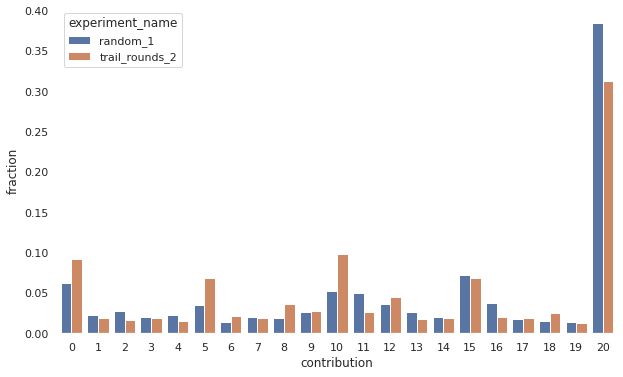

In [4]:
plt.figure(figsize=(10,6))
dfg = df.groupby(['experiment_name'])['contribution'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()

sns.barplot(data=dfg, x='contribution', y='fraction', hue='experiment_name')
plt.savefig(os.path.join(plot_folder, 'distribution_contribution.jpg'), dpi=300, transparent=False)

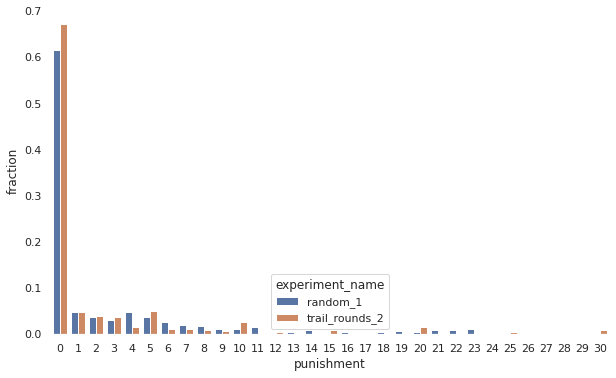

In [5]:
plt.figure(figsize=(10,6))
dfg = df.groupby(['experiment_name'])['punishment'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()

sns.barplot(data=dfg, x='punishment', y='fraction', hue='experiment_name')
plt.savefig(os.path.join(plot_folder, 'distribution_punishments.jpg'), dpi=300, transparent=False)

## Results

* ~32 of all contributions are 20
* ~66 of all punishments are 0
* participants are heavily biased to contribute or punish a multiple of 5
* very few participants use punishments higher then 20

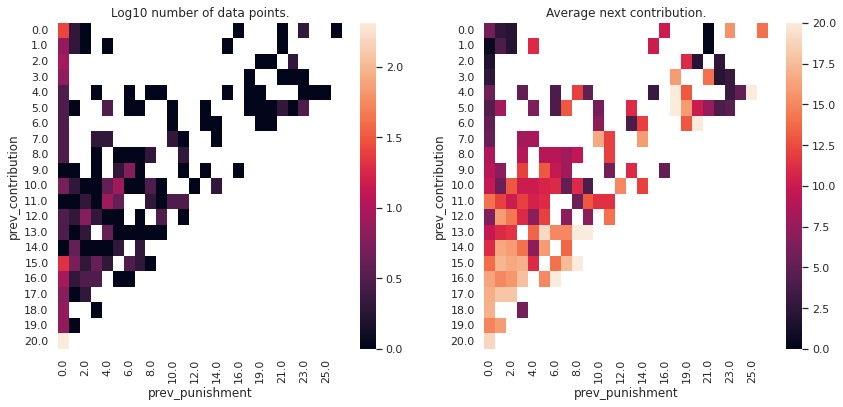

In [6]:
from aimanager.model.cross_validation import split_xy
import numpy as np

w = (
    df['experiment_name'] == 'random_1'
)

df_x, sr_y = split_xy(df[w], filter_nan=True)

df_xy = df_x
df_xy['contribution'] = sr_y

df_xy = df_xy.reset_index()

# plt.figure(figsize=(14,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

cm1 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='contribution', aggfunc=np.mean)
cm2 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='contribution', aggfunc=len)
cm2 = np.log10(cm2)

ax1.set_title('Log10 number of data points.')
sns.heatmap(cm2, ax=ax1)
ax2.set_title('Average next contribution.')
sns.heatmap(cm1, ax=ax2)
plt.savefig(os.path.join(plot_folder, 'prev_cont_pun.jpg'), dpi=300, transparent=False)

## Conclusions

For future sampling
* considering to reduce the number of contribution and punishment levels
* consider sampling with a algorithmic manager to collect additional data with higher punishment rates